<a href="https://colab.research.google.com/github/Aditi-AI-11/Credit-Card-Risk-Protection/blob/main/Another_copy_of_Potato_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Downloading essential modules
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
!pip install matplotlib
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
channels = 3

In [ ]:
#The purpose right now is to download the dataset into tf data input library.
#(A TensorFlow data pipeline is a mechanism to efficiently load, process, and feed data into your machine learning model.
#The pipeline typically uses tf.data.Dataset for constructing scalable input pipelines that can handle large datasets. Using tf dataset we can filter,and map the images.
#Basically for which we upload certain libraries, and then clean the data for model training.

In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

#I have also included the lines that threw me errors. And how I solved them.

NotFoundError: Could not find directory PlantVillage

In [ ]:
#If I am still unsure of the path
import os
dir = os.getcwd()
data_dir = os.path.join(dir, "dataset", "PlantVillage") #'data_dir = os.path.join', to dynamically construct the path

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
# an error line, solution down below

NotFoundError: Could not find directory C:\Users\ASUS LAPTOP\dataset\PlantVillage

In [ ]:
#Providing the exact route of the directory
dataset = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\ASUS LAPTOP\Desktop\Potato Disease Detection\PlantVillage', # 'r' is used to treat the '\' as  literal characters. Because ' \' is used as an escape characeter.
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

#Instead of not including 'r', we can also just replace '\' with '/' (forward slash).
#Literal characters do not attach any special meaning to the '\', and treats them as they are.
#The output shows we have successfully downloaded the 3 files - healthy potato leaves, early blight potato leaves, and late blight potato leaves.

Found 2152 files belonging to 3 classes.


In [ ]:
#Finding the class names
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)
#It gives 68, because each batch roughly contains 32 images.

68

In [ ]:
68*32

2176

In [ ]:
#Exploring the images
for image_batch,label_match in dataset.take(1):
    print(image_batch.shape)
    print(label_match.numpy())
#We use '.numpy()' because the labels are stored as tensors and we want to convert them into a numeric format.
# 'dataset.take(1)' means we are understanding and analysing the structure of 1 batch.
# (32, 256, 256, 3), 32 is the number of images in a single batch, 256 x 256 represent the pixel size, while 3 tells the RBG.
#[1 0 1 0 1 0 0 1 1 0 0 1 2 0 1 2 0 0 0 1 2 0 1 0 1 1 0 0 2 1 0 1], there are 32 labels, each giving us information for what it stands for. eg : 1 : healthy plant, 2 : early blight.

(32, 256, 256, 3)
[1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 2 0 0 0 1 0 1 0 1 2 1 1 1 1 1 1 0]


In [ ]:
# 0 = 'Potato___Early_blight'
# 1 = 'Potato___Late_blight'
# 2 = 'Potato___healthy'

In [ ]:
#To see the color range of the images
for image_batch, label_match in dataset.take(1):
    print(image_batch[0]) #[0] means printing 1 image out of the entire batch.

#As you can see the output comes in tensor format .

tf.Tensor(
[[[147. 144. 153.]
  [135. 132. 141.]
  [127. 124. 133.]
  ...
  [177. 175. 186.]
  [176. 174. 185.]
  [175. 173. 184.]]

 [[135. 132. 141.]
  [137. 134. 143.]
  [138. 135. 144.]
  ...
  [180. 178. 189.]
  [180. 178. 189.]
  [180. 178. 189.]]

 [[131. 128. 137.]
  [135. 132. 141.]
  [138. 135. 144.]
  ...
  [183. 181. 192.]
  [184. 182. 193.]
  [184. 182. 193.]]

 ...

 [[141. 139. 150.]
  [145. 143. 154.]
  [146. 144. 155.]
  ...
  [181. 183. 196.]
  [179. 181. 194.]
  [177. 179. 192.]]

 [[140. 138. 149.]
  [145. 143. 154.]
  [146. 144. 155.]
  ...
  [181. 183. 196.]
  [178. 180. 193.]
  [174. 176. 189.]]

 [[135. 133. 144.]
  [142. 140. 151.]
  [146. 144. 155.]
  ...
  [180. 182. 195.]
  [176. 178. 191.]
  [172. 174. 187.]]], shape=(256, 256, 3), dtype=float32)


In [ ]:
for image_batch, label_match in dataset.take(1):
    print(image_batch[0].numpy())
    print(image_batch[1].numpy())


#The below range ranges between 0-255.

[[[146. 134. 144.]
  [ 89.  77.  87.]
  [ 82.  70.  80.]
  ...
  [149. 142. 150.]
  [150. 143. 151.]
  [150. 143. 151.]]

 [[114. 102. 112.]
  [117. 105. 115.]
  [112. 100. 110.]
  ...
  [145. 138. 146.]
  [144. 137. 145.]
  [144. 137. 145.]]

 [[115. 103. 113.]
  [101.  89.  99.]
  [ 66.  54.  64.]
  ...
  [146. 139. 147.]
  [144. 137. 145.]
  [144. 137. 145.]]

 ...

 [[103.  95. 108.]
  [105.  97. 110.]
  [121. 113. 126.]
  ...
  [153. 147. 161.]
  [149. 143. 157.]
  [141. 135. 149.]]

 [[ 93.  85.  98.]
  [ 92.  84.  97.]
  [107.  99. 112.]
  ...
  [154. 148. 162.]
  [154. 148. 162.]
  [146. 140. 154.]]

 [[117. 109. 122.]
  [100.  92. 105.]
  [102.  94. 107.]
  ...
  [147. 141. 155.]
  [148. 142. 156.]
  [140. 134. 148.]]]
[[[172. 174. 187.]
  [171. 173. 186.]
  [171. 173. 186.]
  ...
  [187. 190. 199.]
  [189. 192. 201.]
  [189. 192. 201.]]

 [[171. 173. 186.]
  [170. 172. 185.]
  [169. 171. 184.]
  ...
  [192. 195. 204.]
  [193. 196. 205.]
  [191. 194. 203.]]

 [[172. 174. 187.]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


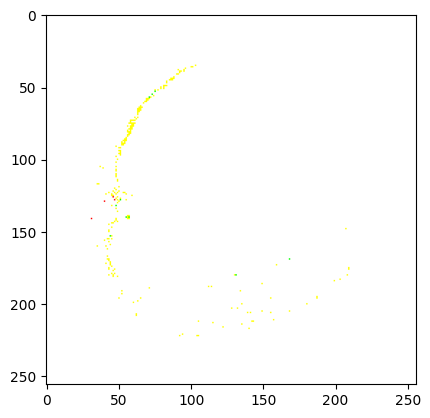

In [ ]:
#Visualizing the image
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy())

#('plt.imshow' expects a 3-D array.)

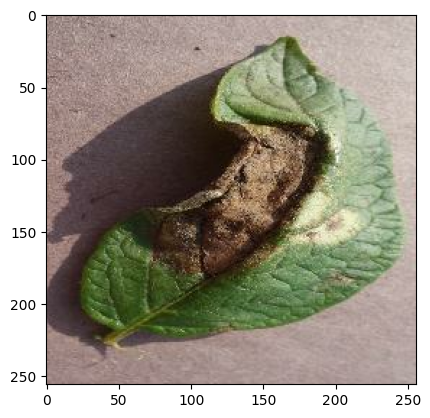

In [ ]:
#Clipping the input data to the integer range [0-255].
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))


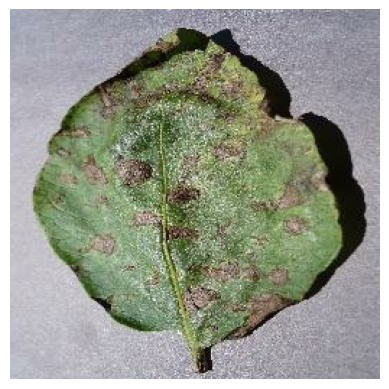

In [ ]:
#To hide the axis
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis('off')
#The images are changing because they are being shuffled.

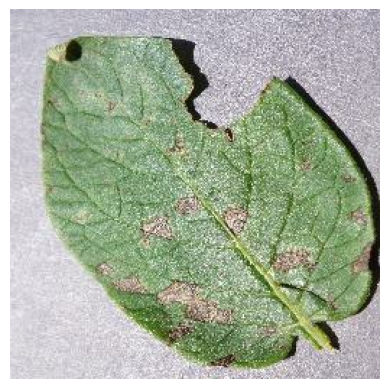

In [ ]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis('off')
#another shuffled new image

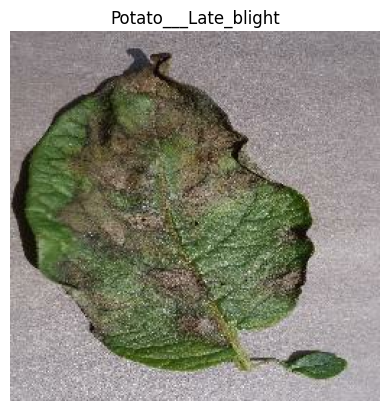

In [ ]:
#Giving a title to the images
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]]) #only using 'label_natch[0]' gives the number. Using 'class_names' with it gives the entire name.
    plt.axis('off')

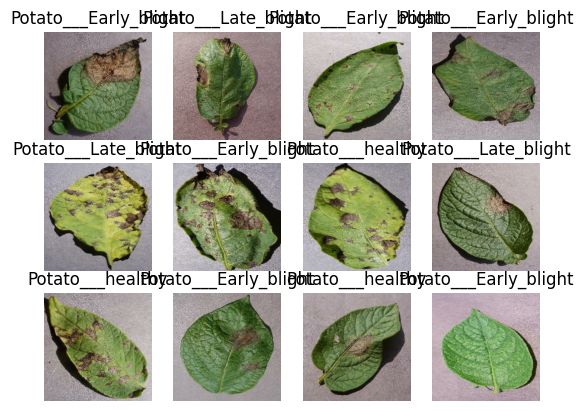

In [ ]:
#I want to see 12 images from a batch of 32 images together.
for image_batch, label_match in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

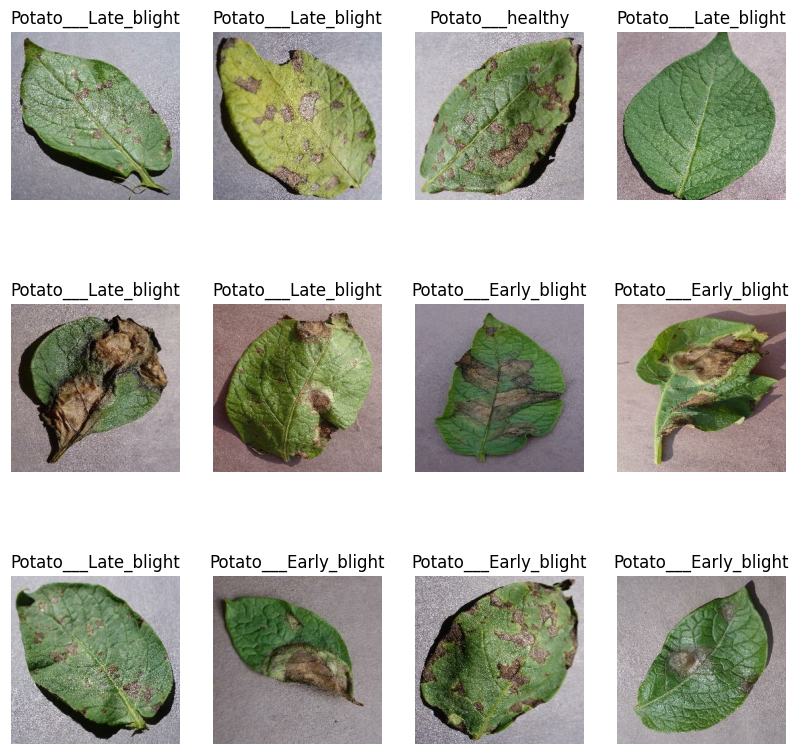

In [ ]:
#There's overlapping of names, to sort this we will increase the area of each of the images.
plt.figure(figsize = (10,10))
for image_batch, label_match in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
#'ax = plt.subplot(3, 4, i+1)' creates a grid of 12 subplots arranged in 3 rows and 4 columns.
#'plt.figure(figsize=(10,10))' controls the overall size of the figure, determining how large the entire grid will appear. (Not exactly how the images fit.)

In [ ]:
#80% ==> training
#10% ==> validation, 10% testing

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
#In the above coding lines, we used hard core numbers to form training, validation, and testing datasets.
#We will wrap the same into a python function.

import tensorflow as tf

def get_dataset_partitions_tf(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    # Shuffle the dataset if requested
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)

    # Calculate the sizes for each split
    train_size = int(train_split * dataset.cardinality().numpy())
    val_size = int(val_split * dataset.cardinality().numpy())

    # Split the dataset into train, validation, and test
    train_ds = dataset.take(train_size)
    remaining_ds = dataset.skip(train_size)
    val_ds = remaining_ds.take(val_size)
    test_ds = remaining_ds.skip(val_size)

    return train_ds, val_ds, test_ds
#'shuffle_size = 10000' ensures the data is shuffled thoroughly.
# While 'seed = 12' represents the reproducibility of the same shuffle again. Meaning, everytime you run the code the data will be shuffled in the same way.

In [ ]:
 train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
#We apply caching and pre-snatching in the next step.
#Caching stores the loaded data inside a memory, which handles redundant data loading and preprocessing. Making the process faster for model training.
# Simultaneously while data is being preprocessed, pre-fetching keeps the next batch ready for preprocessing.
#Caching and pre-fetching help reduce data loading bottlenecks.
#Shuffling is used to randomize the data so the model doesn't learn a pattern.
#Batching, the data is supplied to the model in batches, making the model training process efficient and faster.

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#Dataset is kind of optimised.

In [ ]:
#We will use this layer in our model training.

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])
#Resizing: It changes the size of the image to a fixed size (in your case, IMAGE_SIZE x IMAGE_SIZE).
#This makes sure all images are the same size before feeding them into the model.

#Rescaling: It adjusts the pixel values of the image. Normally, pixel values are between 0 and 255.
#Rescaling divides all values by 255, making them between 0 and 1. This helps the model learn better because it's easier to work with smaller numbers.
#Rescaling is a form of normalization. By dividing pixel values by 255, I am normalizing them to a range between 0 and 1.

In [ ]:
#Data Augmentation(Preprocessing): We enhance our dataset by creating variations of each image through techniques like flipping, rotating, and adjusting the image's contrast.
#This helps the model become more robust and improves its ability to handle different image conditions it might encounter.
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

In [ ]:
#Stacking means that each layer is connected to the other layers. The next layer takes what the previous layer produced and processes it further.
#'layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape)', this is a convolutional layer of 32 filters of size 3x3 that scan over the image.
# activation='relu': This applies a ReLU function to keep the positive values and discard negatives.
# 'input_shape=input_shape': This tells the model the shape of the input image (256x256x3).
# 'layers.MaxPooling2D((2, 2))': Reduces the size of the image. Making it computationally efficient and highlights important features.
# 'layers.Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2))': These layers are similar to the first convolution and pooling layers but with more filters (64 filters)
       # to learn more detailed patterns from the images. Each time, the image is processed, and its size is reduced by the pooling layers.
# 'layers.Flatten()': Flattening turns the 2D data (from the images) into a 1D vector, so it can be fed into the final dense (fully connected) layers.
# 'layers.Dense(64, activation='relu'), layers.Dense(n_classes, activation='softmax')': Dense Layers are fully connected layers where every neuron connects to every neuron in the previous layer.
      # The first Dense(64) layer has 64 neurons.
# The last Dense(n_classes) layer outputs n_classes neurons (one for each class) with softmax activation, which converts the output into probabilities for each class.
# 'model.summary()':This prints out the structure of your model so you can see each layer, its shape, and the number of parameters (weights) involved.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define parameters
IMAGE_SIZE = 256
channels = 3
n_classes = 3     # Number of classes for classification

# Define input shape without batch size
input_shape = (IMAGE_SIZE, IMAGE_SIZE, channels)

# Define the model
model = models.Sequential([                           #This buildsthe model by stacking layers after layers in a sequence.
    layers.InputLayer(input_shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# Print model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Explanation of how the algorithm mentioned above works:
# 1. Weights and biases are applied before the output of each layer (convolutional and dense).
#2. ReLU is applied to the output after weights and biases, setting negative values to 0 and allowing only positives to pass forward.
    #This ensures only substantial information is passed forward.
#3. After several convolutional layers, outputs are 2D feature maps.
#4. Flattening converts these 2D feature maps into a 1D vector for the dense layers.
#5. Dense layers use weights, biases, and ReLU to further process the 1D vector.
#6. Softmax converts the final dense layer's output into probabilities for each class.

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)


In [ ]:
EPOCHS = 50
BATCH_SIZE = 32

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.4171 - loss: 0.9361 - val_accuracy: 0.5729 - val_loss: 0.7912
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6905 - loss: 0.6973 - val_accuracy: 0.8333 - val_loss: 0.4186
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8264 - loss: 0.4100 - val_accuracy: 0.8802 - val_loss: 0.2887
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8749 - loss: 0.3188 - val_accuracy: 0.8802 - val_loss: 0.3317
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.8911 - loss: 0.2626 - val_accuracy: 0.8958 - val_loss: 0.2944
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9139 - loss: 0.2190 - val_accuracy: 0.9062 - val_loss: 0.2298
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9031 - loss: 0.2210 - val_accuracy: 0.9062 - val_loss: 0.2861
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9070 - loss: 0.2223 - val_accuracy: 0.9167 - val_loss:

In [ ]:
#1.Adam Optimizer: Adjusts the weights during training to reduce the loss and improve accuracy.
#2. Softmax: Assigns probabilities to each class (e.g., healthy, early blight, late blight), with the highest probability determining the final prediction.
#3. Epochs and Batches: The model processes images in batches (e.g., 32 images per batch), and after all batches are processed, one epoch is complete.
    #It also updates the weights after iterating over each batch.
#4. Labels and Image Details: The model learns from the features in the images (tiny details), but its performance is ultimately compared to the labels (ground truth).
#5. Validation: After each epoch, the model evaluates its performance on a separate validation dataset to ensure it generalizes well and isn't just memorizing the training data.
#6. Compiling & Fitting: Prepares the model by selecting the optimizer (Adam), loss function, and metrics (accuracy) used during training and evaluation. In the fit step the model is trained.

In [ ]:
# -------- This line of code is only for undertanding purpose. It is not included in the overall process.


#We might encounter a case where the validation accuracy and accuracy becomes jumpy, say somewhere around the 30th epoch it looses more than a few point.
#The behavior we are describing, where accuracy and validation accuracy start to drop after a certain point, is likely a case of overfitting.
   #Here's why this happens and how we can address it:
# 1. By introducing early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=val_ds,
    callbacks=[early_stopping]
)
                 #The model trains for multiple epochs, updating weights each time.(The model updates weights after processing each batch of 32 images.)
                 #Early stopping monitors the validation loss (val_loss).
                 #If val_loss stops improving for 5 epochs, early stopping triggers.
                 #Training stops when early stopping is triggered.
                 #It doesn’t revise the weights.
                 #The model restores the best weights from the epoch with the lowest val_loss. And starts the training again.

#2. By reducing the number of epochs.
#3. Regularization techniques like L2 regularization or dropout can help reduce overfitting.
from tensorflow.keras.layers import Dropout, Dense

# Example of adding Dropout in your model
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Drop 50% of neurons to reduce overfitting
model.add(Dense(n_classes, activation='softmax'))

#4. By applying data augmentation. Which we have already done.
#5. Reduce Model Complexity: by reducing the layers

In [ ]:
# Monitoring with Plots: We can monitor the training and validation accuracy/loss using a plot to see exactly where things start to go wrong.
# Plot training & validation accuracy values
#There are 4 parameters recorded in the variable history.
history.history.keys()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

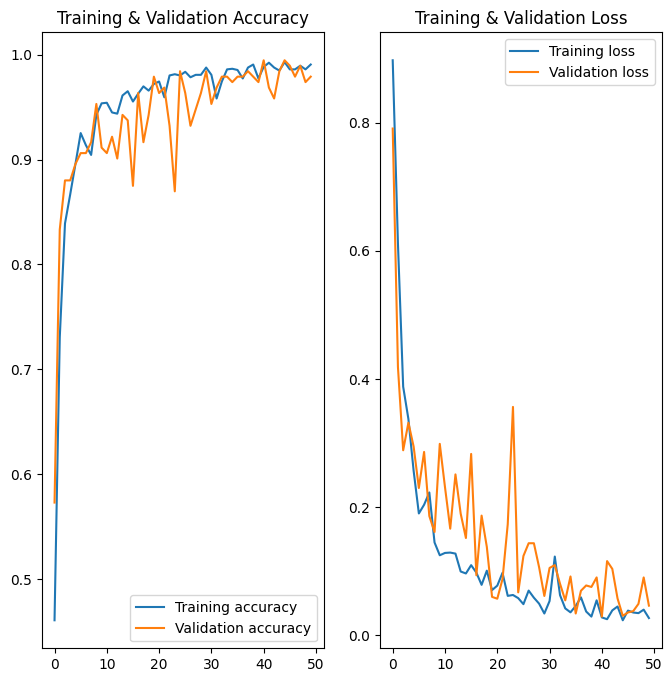

In [ ]:
epochs_range = range(len(acc))  # This matches the actual length of the accuracy data

plt.figure(figsize=(8,8))

# Plot Training & Validation Accuracy
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

# Plot Training & Validation Loss
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')

plt.show()
#The plots shows that the training could have been stopped after the 30th epoch.


In [ ]:
# -------- This line of code is only for undertanding purpose. It is not included in the overall process.


#We might encounter a case of temporarily fluctuating accuracy. Where both the training accuracy and validation accuracy drop temporarily.
#This kind of behavior can be influenced by several factors, and there are ways to address it:
#1. Learning Rate Fluctuations: Sometimes, fluctuations occur due to a learning rate that is too high.
    #The model might be "jumping" around the optimal point instead of converging smoothly.
    #Solution: Use a learning rate scheduler or learning rate decay to gradually decrease the learning rate as training progresses.
    #This allows the model to make smaller adjustments later in training, reducing oscillations.
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch, lr):
    if epoch > 25:
        return lr * 0.5  # Reduce learning rate after 25 epochs
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)
#2. Sometimes the model makes too much noise when the training set too small.


In [ ]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 403ms/step - accuracy: 0.9965 - loss: 0.0104


first image to predict
Actual Label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Predicted Label: Potato___Late_blight


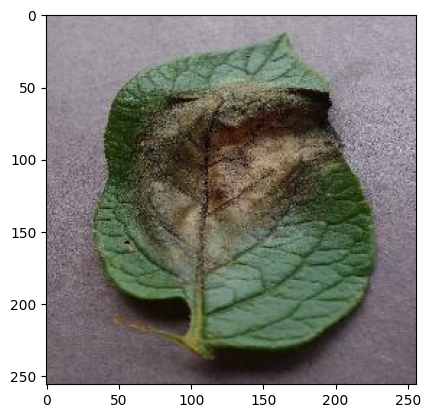

In [ ]:
#Making predictions
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')  #We convert the image to a NumPy array because libraries like Matplotlib (plt.imshow()) work with NumPy arrays, not TensorFlow tensors.
    first_label = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("Actual Label:", class_names[first_label]) #Labels are numbers like 0, 1, and 2, and we turn them into class names so we can understand them better.

    batch_prediction = model.predict(images_batch) #Makes predictions for all images in the batch.
    print("Predicted Label:", class_names[np.argmax(batch_prediction[0])])

#np.argmax: Finds the index of the maximum value in an array, which is useful for getting the predicted class from a list of probabilities.

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) #Even though images is plural, we are using only one image at a time with images[i].
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    #predictions[0]: This is the model's prediction for the first (and only) image in the batch. It’s an array of probabilities for each class (e.g., [0.1, 0.2, 0.7]).
    #np.max(predictions[0]): This gets the highest probability from the array (e.g., 0.7).
    return predicted_class, confidence #The function returns the predicted class and how confident the model is about that prediction.

#The line tf.expand_dims(img_array, 0) adds a new dimension to make the image look like a batch (even if it’s just one image), so the model can process it properly.
#After tf.expand_dims(img_array, 0), the shape becomes (1, 256, 256, 3)—this means a batch with 1 image.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


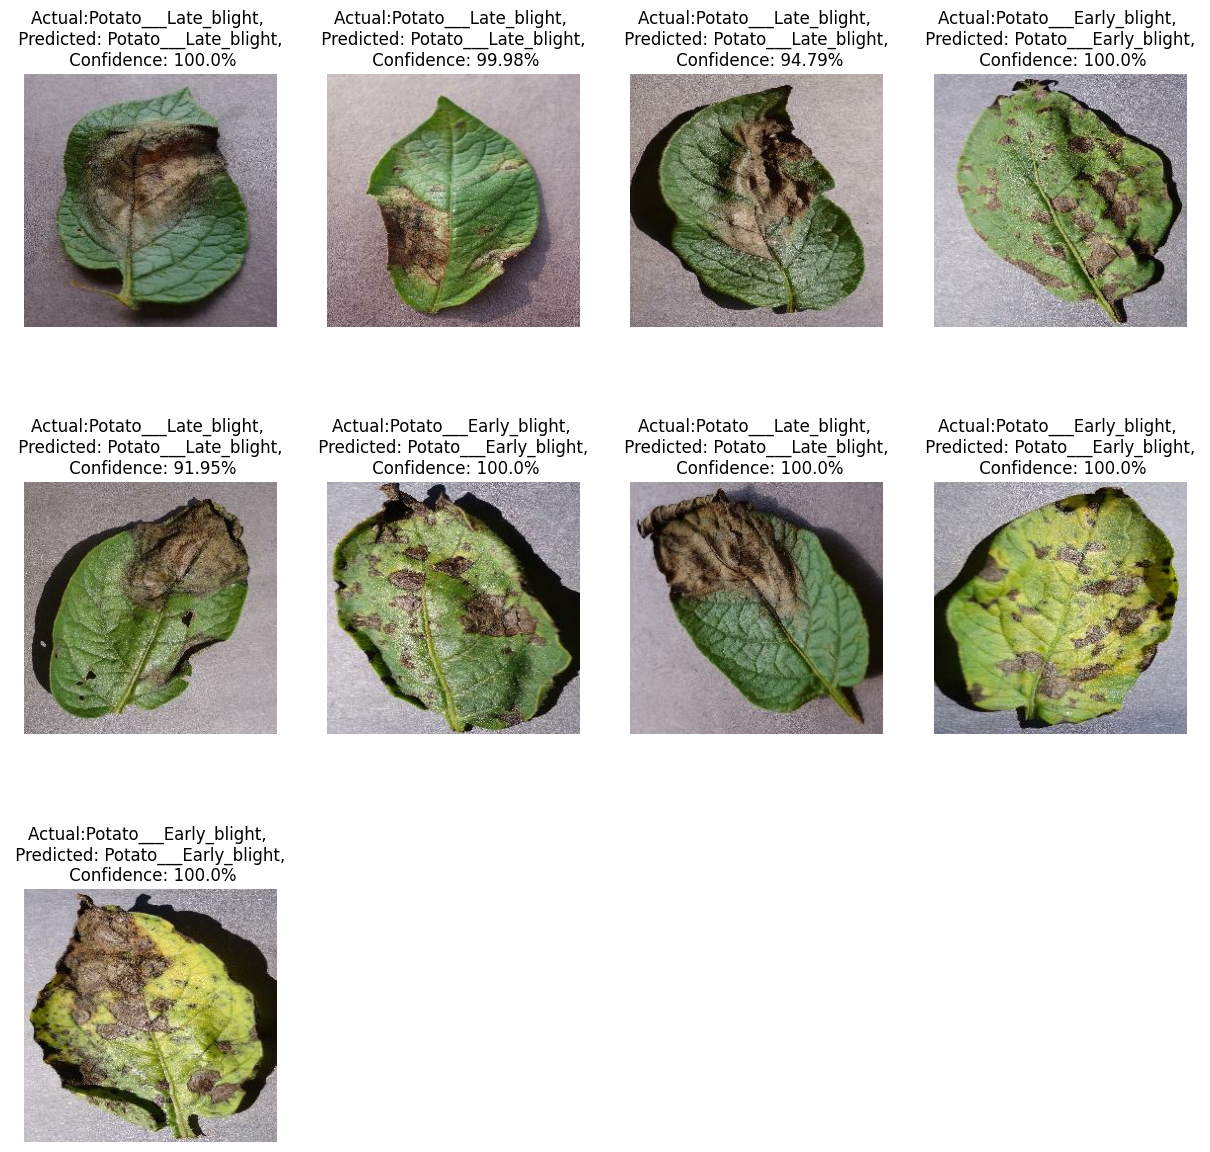

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8")) #astype("uint8") is used so that plt.show() can plot the image because it cannot plot images in float format.
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%")
#f-strings allow us to use variables inside a string by wrapping them inside curly braces. In the above line, "Actual:" is text, while actual_class is the variable, and its value is inserted in the string.
        plt.axis("off")